# INSTALL DEPENDENCIES

In [2]:
!pip install roboflow
!pip install ultralytics

In [1]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.6 MB/s eta 0:00:00


In [3]:
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 3.6 MB/s eta 0:00:00


# IMPORT LIBRARIES

In [4]:
import shutil
import roboflow
from roboflow import Roboflow
import ultralytics
from ultralytics import YOLO
from IPython import display
from IPython.display import display, Image
ultralytics.checks()
import supervision as sv
import os
import cv2


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.1/201.2 GB disk)


# DATASET

In [5]:

rf = Roboflow(api_key="UEL4ocB1mWuehYh2nl0m")
project = rf.workspace("abm").project("pose-qq42u")
version = project.version(11)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to pose-11 in yolov8:: 100%|██████████| 16436/16436 [00:02<00:00, 5972.32it/s]


# DATA WRANGLING

In [6]:
# Move training data
shutil.move("/content/pose-11/train", "/content/datasets/roboflow/train")

# Move testing data
shutil.move("/content/pose-11/test", "/content/datasets/roboflow/test")

# Move validation data
shutil.move("/content/pose-11/valid", "/content/datasets/roboflow/valid")

'/content/datasets/roboflow/valid'

# MODEL TRAINING

In [8]:
!yolo detect train data="/content/data.yaml" model=yolov8n.pt epochs=100 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 188MB/s]
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

# TEST THE MODEL

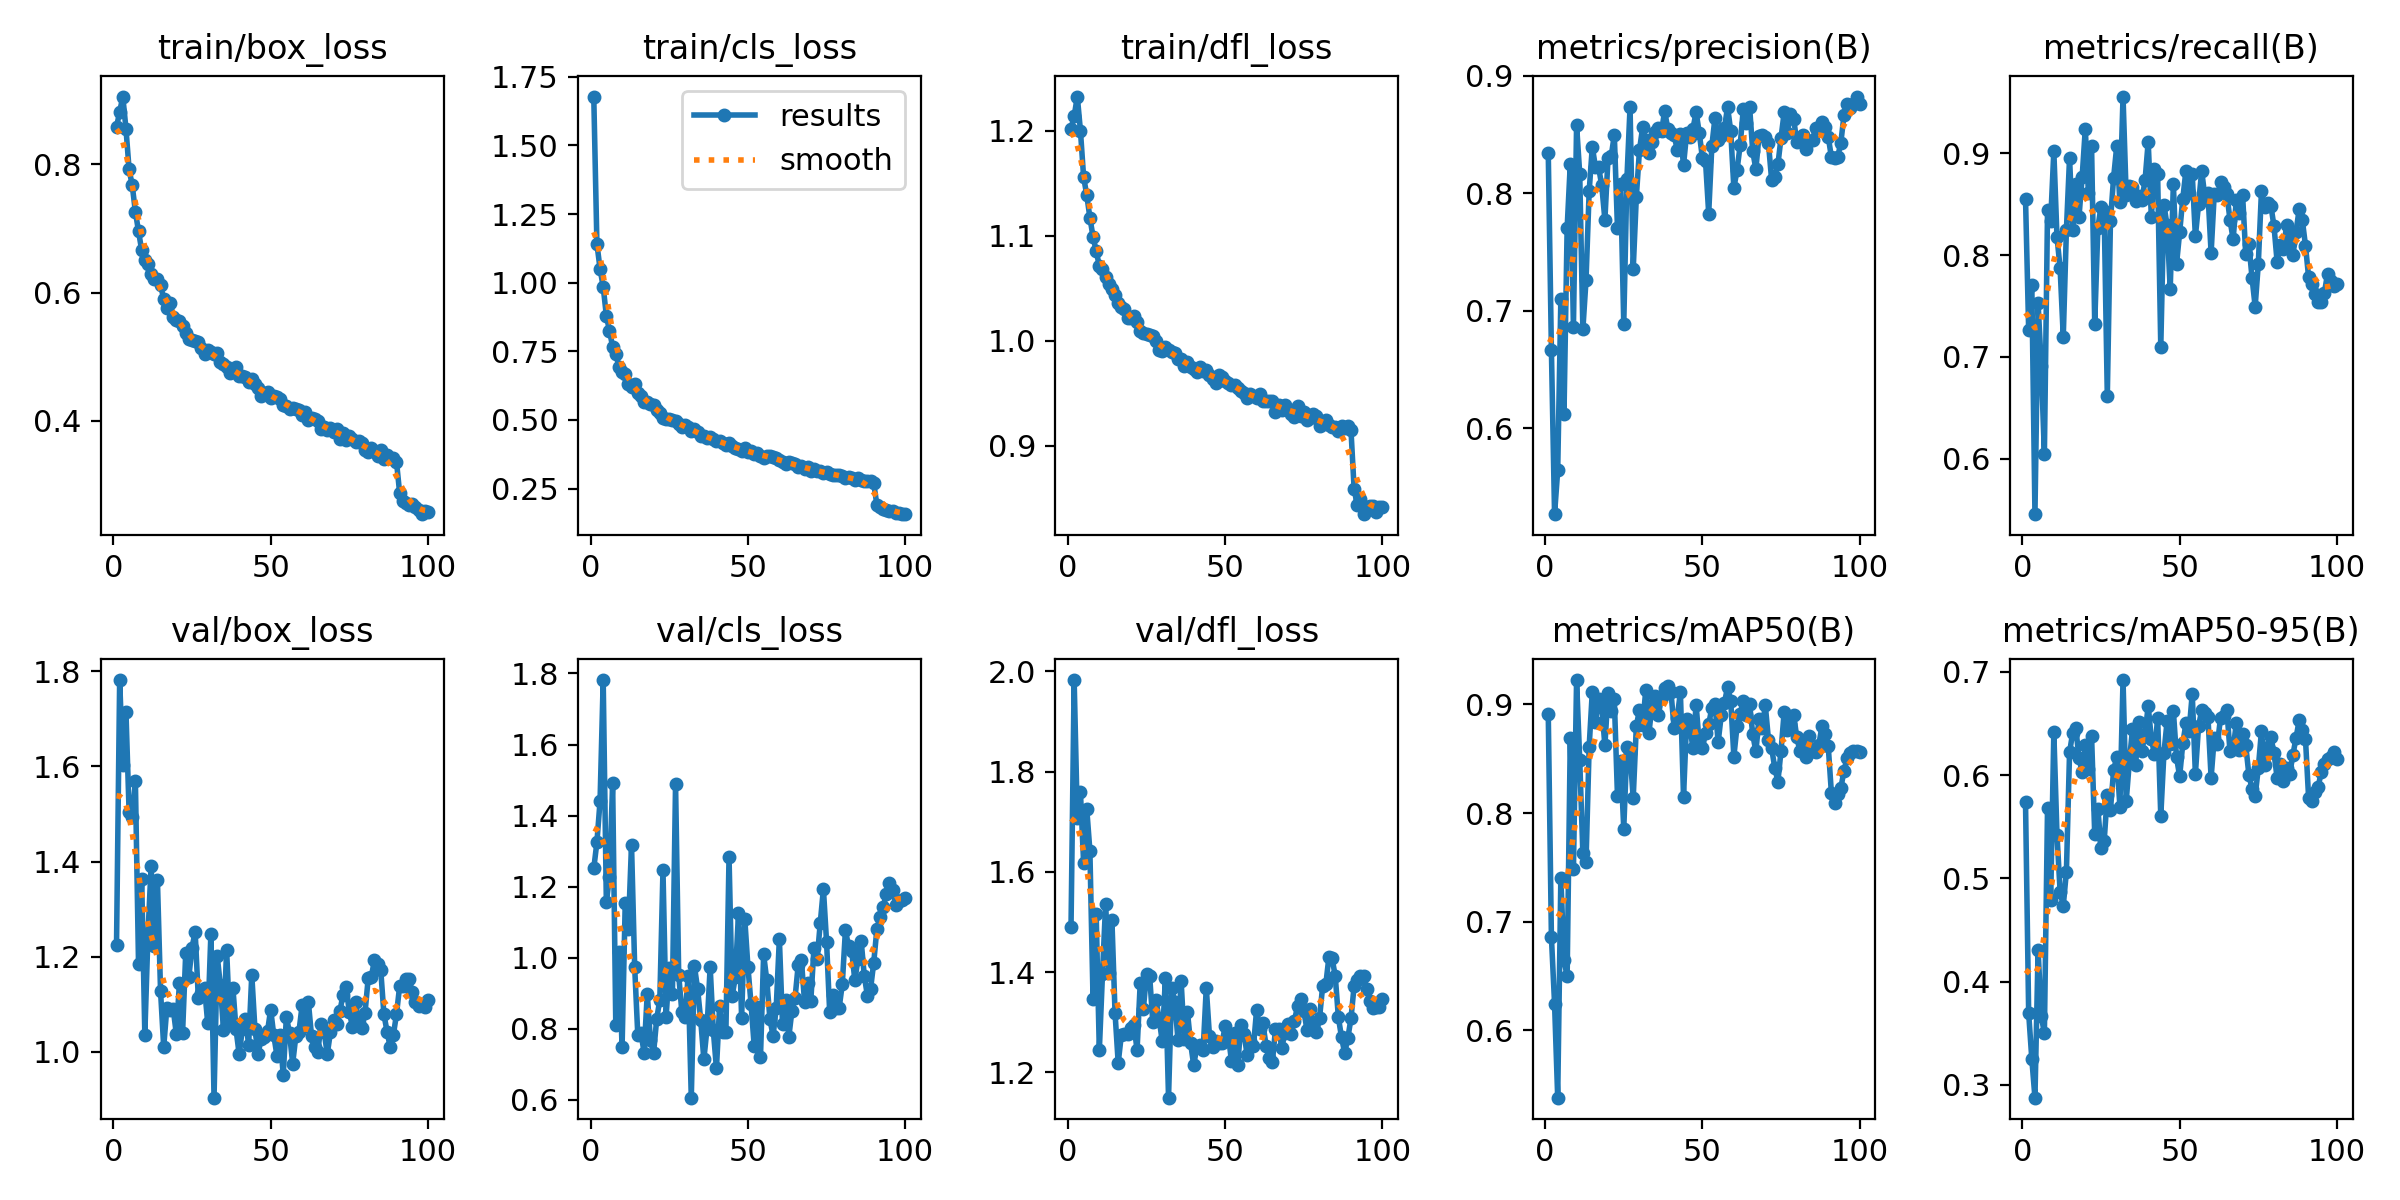

In [9]:
Image(filename=f'/content/runs/detect/train/results.png',width=1400)

In [10]:
!yolo mode=predict model='/content/runs/detect/train/weights/best.pt' conf=0.4 source="/content/datasets/roboflow/test/images" save=true

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1030 /content/datasets/roboflow/test/images/Top-50-Craziest-Knockouts-Of-2023-_-MMA-Kickboxing-Bare-Knuckle-Knockouts_mp4-0_jpg.rf.9468436644056e507db25cd1a4996af0.jpg: 384x640 1 violence, 105.9ms
image 2/1030 /content/datasets/roboflow/test/images/Top-50-Craziest-Knockouts-Of-2023-_-MMA-Kickboxing-Bare-Knuckle-Knockouts_mp4-101_jpg.rf.4fe0e1939c933ab6a529808daf40cd4a.jpg: 384x640 1 violence, 7.4ms
image 3/1030 /content/datasets/roboflow/test/images/Top-50-Craziest-Knockouts-Of-2023-_-MMA-Kickboxing-Bare-Knuckle-Knockouts_mp4-102_jpg.rf.55938b893a1b0166dfd6dd47c2e5309c.jpg: 384x640 1 violence, 7.0ms
image 4/1030 /content/datasets/roboflow/test/images/Top-50-Craziest-Knockouts-Of-2023-_-MMA-Kickboxing-Bare-Knuckle-Knockouts_mp4-103_jpg.rf.07becde29176c68f9d9e96bce76c4513.jpg: 384x640 1 violence, 7.3ms
i

In [11]:
image_paths = sv.list_files_with_extensions(directory="/content/runs/detect/predict",extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

image count: 2060


In [12]:
IMAGE_DIR_PATH = "/content/runs/detect/predict"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE=(16,16)

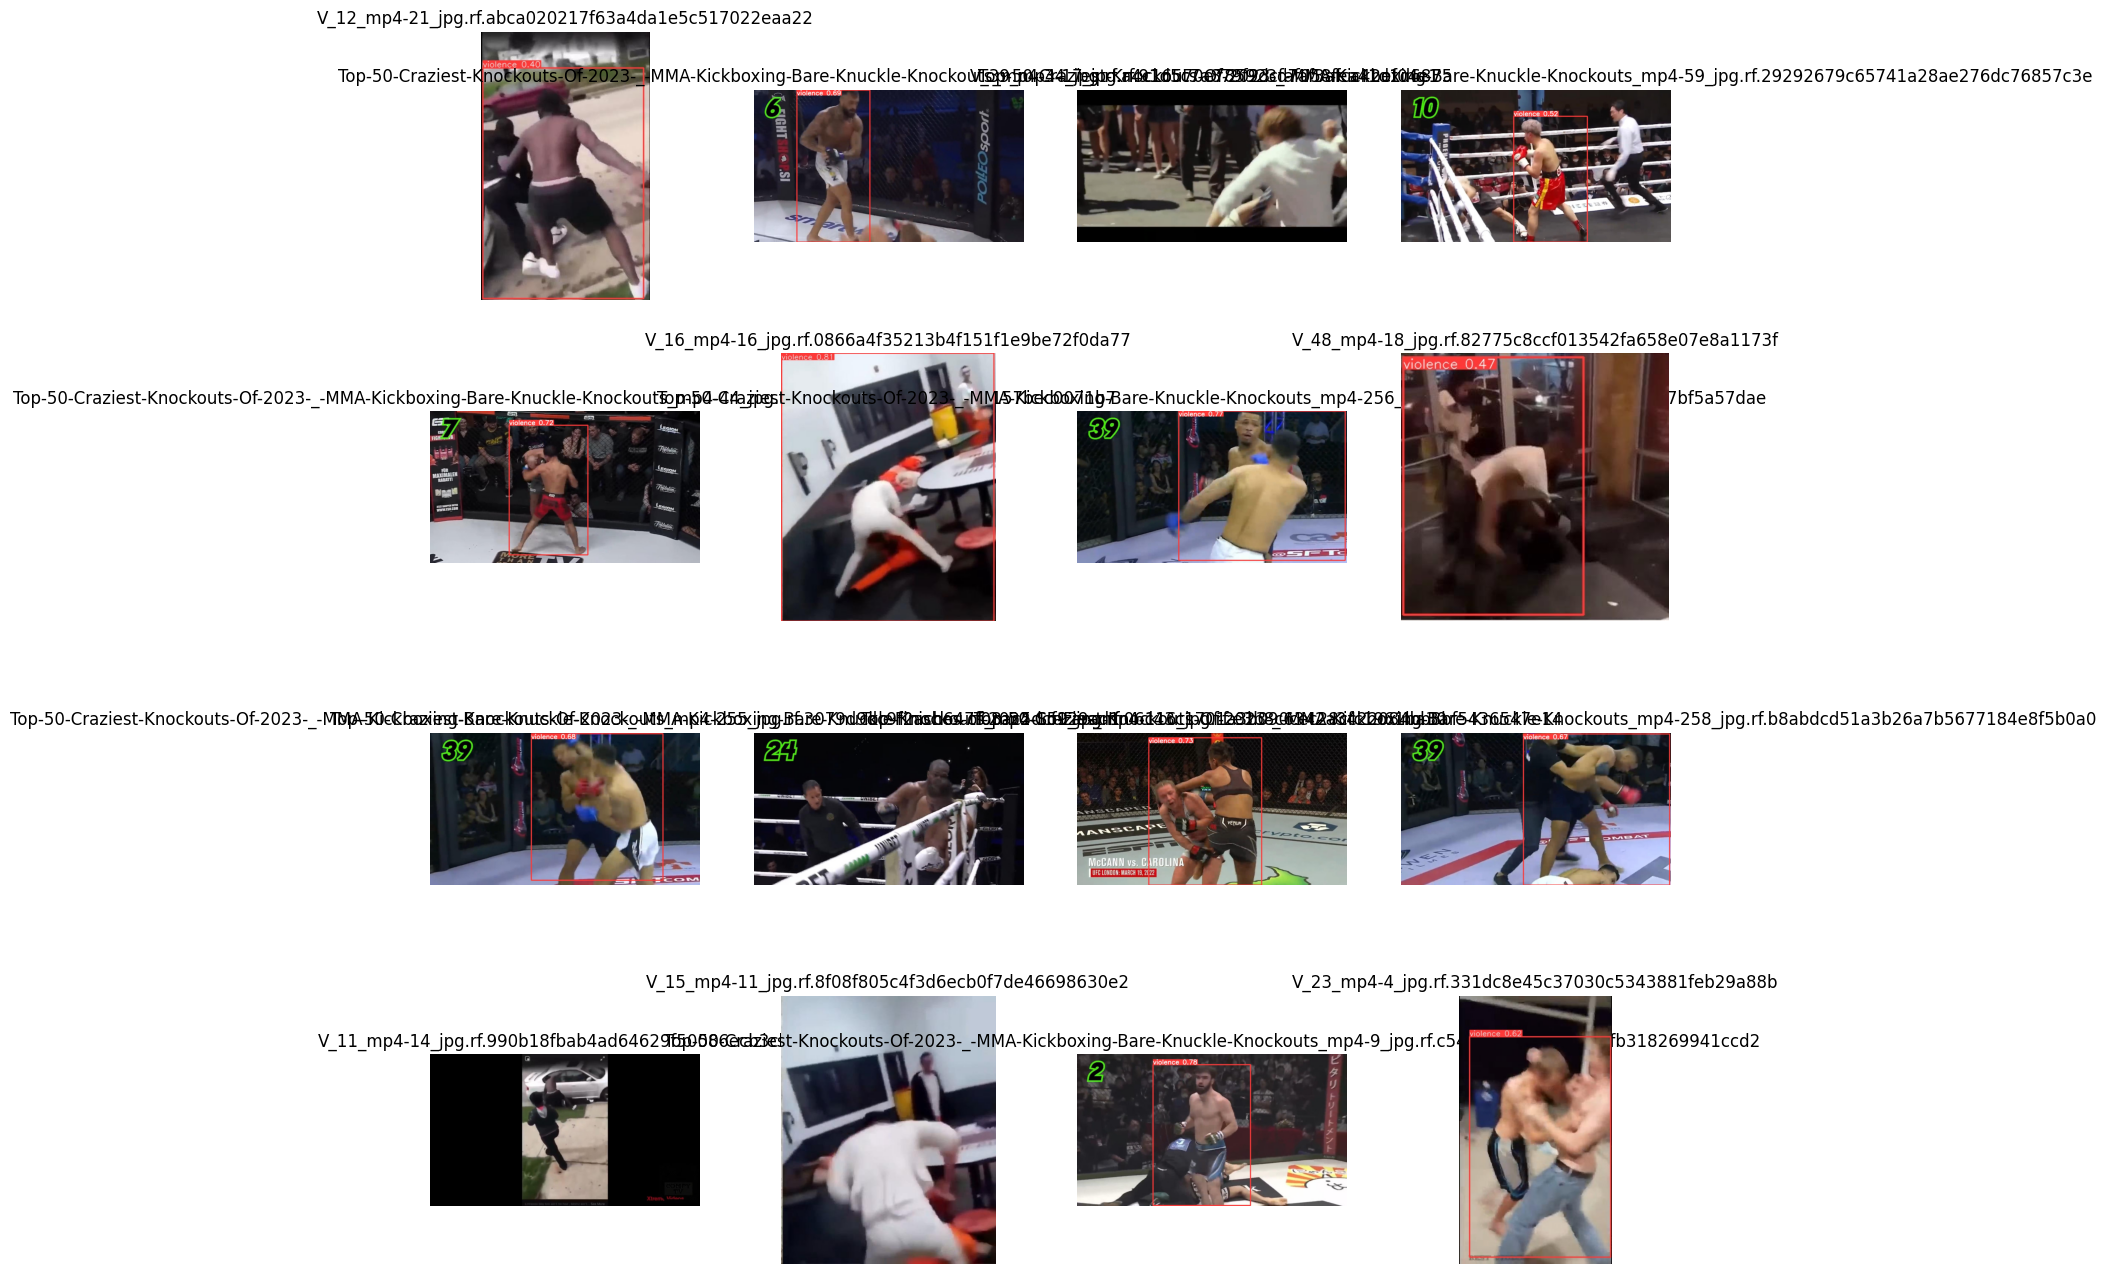

In [13]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

In [23]:
from pytube import YouTube

def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")


link = input("Enter the YouTube video URL: ")
Download(link)

Enter the YouTube video URL: https://www.youtube.com/watch?v=Z-NAigzTh0U
Download is completed successfully


In [18]:
!yolo predict model='/content/runs/detect/train/weights/best.pt' source="/content/Washington County jail inmate attacks deputy.mp4"

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 105.4ms
video 1/1 (frame 2/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 7.1ms
video 1/1 (frame 3/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 6.7ms
video 1/1 (frame 4/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 6.6ms
video 1/1 (frame 5/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 6.5ms
video 1/1 (frame 6/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 7.7ms
video 1/1 (frame 7/1323) /content/Washington County jail inmate attacks deputy.mp4: 384x640 (no detections), 7.5ms
video 1/1 (fra